### We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let’s display the first five rows of data

In [208]:
airline=pd.read_csv('airlines_passengers.csv')
airline.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [209]:
airline.tail()

Month  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [210]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

#### The next thing we can do is convert the month column to an index. 


In [211]:
airline = airline.set_index('Month')
airline

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

In [212]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

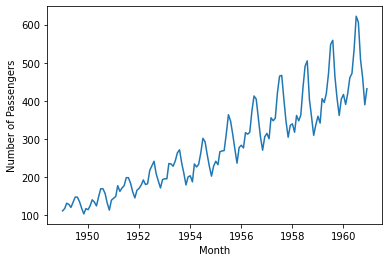

In [213]:
sns.lineplot(data=airline, x="Month", y="Passengers")
plt.ylabel("Number of Passengers")

#### Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [214]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#### Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [215]:
X = airline.values
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
5% Critical Value: -2.88
p-value: 0.991880


#### Store our results in a dataframe display it

In [216]:
Result=pd.DataFrame(result)
Result

0
0                                           0.815369
1                                            0.99188
2                                                 13
3                                                130
4  {'1%': -3.4816817173418295, '5%': -2.884041834...
5                                         996.692931

#### Explain the results

The value of the p parameter is equal to 0.99, which is high and for sure greater than 0.05 which means that I have to reject H0 hypothesis which stated that the data is stationary. 

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

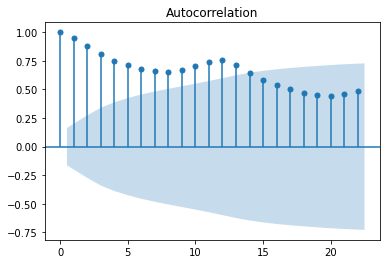

In [217]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(airline)
plt.show()

#### Calculate partial autocorrelation

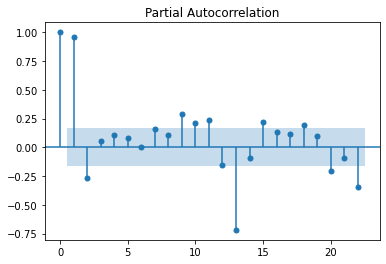

In [218]:
plot_pacf(airline)
plt.show()

The plot confirms our assumption about the correlation on lag 12. The same is visible at lag 24, but the correlation declines over time. Value 12 periods ago has more impact on the value today than value 24 periods ago does.
Another thing to note is the shaded area. Anything inside it isn’t statistically significant

#### Now Decomposition
Decomposition Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package: from statsmodels.tsa.seasonal import seasonal_decompose

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


In [220]:
airline.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

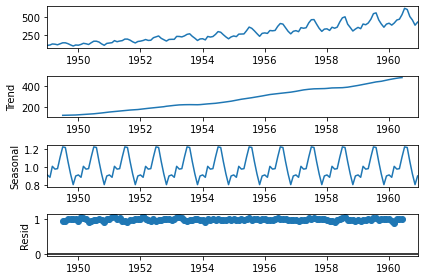

In [221]:
Decompose = seasonal_decompose(airline, model='multiplicative')
Decompose.plot()
plt.show()


Can you describe the charts?


In the first graph, the original data so the time series of passengers. 

In the next one, number of passengers increases in time 

The third garph shows seasonality, so how data is repeated in time. 

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the early and later years of the series

#### Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [222]:
airline['Difference'] = airline['Passengers'].diff()

In [223]:
#Now check if the data is stationary 
result = adfuller(airline.Difference.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


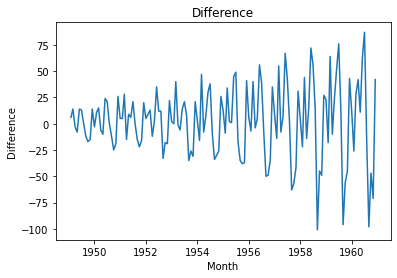

In [225]:
sns.lineplot(x=airline.index, y=airline.Difference)
plt.title('Difference')
plt.show()

In [227]:
# Another Method:
from statsmodels.tsa.stattools import kpss

result = kpss(airline.Difference)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(nan, nan, 14, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: nan
5% Critical Value: 0.46
p-value: nan


#### For the second test the p-value is below 0.10 so the data is not stationary, so, try another method I will try to do log and then diff 

In [228]:
import numpy as np
airline['log'] = np.log(airline.Passengers)
airline['log'] = airline['log'].diff()
airline = airline.drop(airline.index[0])

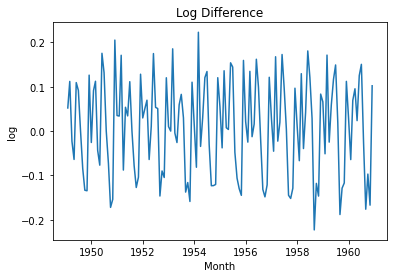

In [229]:
sns.lineplot(x=airline.index, y=airline.log)
plt.title('Log Difference')
plt.show()


In [230]:
airline.head()

Passengers  Difference       log
Month                                       
1949-02-01         118         6.0  0.052186
1949-03-01         132        14.0  0.112117
1949-04-01         129        -3.0 -0.022990
1949-05-01         121        -8.0 -0.064022
1949-06-01         135        14.0  0.109484

In [233]:
#Now, stationarity using adfuller method
result = adfuller(airline.log.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.72
5% Critical Value: -2.88
p-value: 0.07


#### The Box-Cox transformation transforms our data so that it closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests.

In [235]:
from scipy.stats import boxcox

airline['boxcox'],parameters= boxcox(airline['Passengers'])
airline['boxcox']=airline['boxcox'].diff()

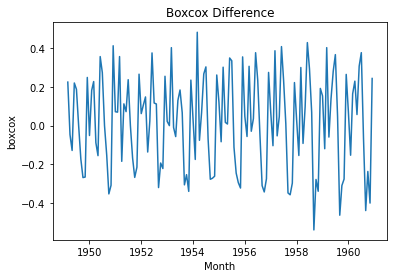

In [236]:
sns.lineplot(x=airline.index, y=airline.boxcox)
plt.title('Boxcox Difference')
plt.show()

In [237]:
result = adfuller(airline.boxcox.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.39
5% Critical Value: -2.88
p-value: 0.01


#### Now p-value is less than 0.05 which means that I can reject H0 hypothesis and the data is stationary

#### MA(1) -Moving Averages

In [240]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(airline.boxcox.dropna(), order=(0, 1))
result = model.fit()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [241]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(0, 1)   Log Likelihood                   5.890
Method:                       css-mle   S.D. of innovations              0.232
Date:                Wed, 19 Jan 2022   AIC                             -5.779
Time:                        15:36:26   BIC                              3.088
Sample:                    03-01-1949   HQIC                            -2.176
                         - 12-01-1960                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0212      0.025      0.843      0.399      -0.028       0.070
ma.L1.boxcox     0.2915      0.094      3.086      0.002       0.106       0.477
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.4304           +0.0000j            3.4304            0.5000
-----------------------------------------------------------------------------
"""

In [242]:
# Predictions:
pred_model = result.predict(airline.boxcox.index[-15],airline.boxcox.index[-1])

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [243]:
from statsmodels.tools.eval_measures import rmse
rmse_1 = rmse(airline.boxcox[-15:],pred_model)
rmse_1

0.2472733457671486

#### MA(2)- Moving Averages

In [286]:
from statsmodels.tsa.arima_model import ARMA
model_2 = ARMA(airline.boxcox.dropna(), order=(0, 2))
result_2 = model_2.fit()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [248]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(0, 2)   Log Likelihood                   8.086
Method:                       css-mle   S.D. of innovations              0.228
Date:                Wed, 19 Jan 2022   AIC                             -8.173
Time:                        15:41:54   BIC                              3.650
Sample:                    03-01-1949   HQIC                            -3.368
                         - 12-01-1960                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0208      0.017      1.205      0.228      -0.013       0.055
ma.L1.boxcox     0.2310      0.112      2.063      0.039       0.012       0.451
ma.L2.boxcox    -0.3318      0.181     -1.831      0.067      -0.687       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4224           +0.0000j            1.4224            0.5000
MA.2            2.1187           +0.0000j            2.1187            0.0000
-----------------------------------------------------------------------------
"""

#### Display the output

In [249]:
# Predictions:
pred_model_2 = result_2.predict(airline.boxcox.index[-15],airline.boxcox.index[-1])

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [251]:
from statsmodels.tools.eval_measures import rmse
rmse_2 = rmse(airline.boxcox[-15:],pred_model_2)
rmse_2

0.2569153022351167

#### AR () Auto Regression model

In [287]:
model_3 = ARMA(airline.boxcox.dropna(), order=(2, 0))
result_3 = model_3.fit()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [288]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(2, 0)   Log Likelihood                   6.873
Method:                       css-mle   S.D. of innovations              0.230
Date:                Wed, 19 Jan 2022   AIC                             -5.745
Time:                        17:16:53   BIC                              6.078
Sample:                    03-01-1949   HQIC                            -0.941
                         - 12-01-1960                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0210      0.021      0.997      0.319      -0.020       0.062
ar.L1.boxcox     0.2563      0.083      3.080      0.002       0.093       0.419
ar.L2.boxcox    -0.1760      0.084     -2.102      0.036      -0.340      -0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7281           -2.2696j            2.3835           -0.2006
AR.2            0.7281           +2.2696j            2.3835            0.2006
-----------------------------------------------------------------------------
"""

In [254]:
# Predictions:
pred_model_3 = result_3.predict(airline.boxcox.index[-15],airline.boxcox.index[-1])

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [255]:
from statsmodels.tools.eval_measures import rmse
rmse_3 = rmse(airline.boxcox[-15:],pred_model_3)
rmse_3

0.24784866745824363

#### ARMA ()

In [257]:
model_4 = ARMA(airline.boxcox.dropna(), order=(2, 2))
result_4 = model_4.fit()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [258]:
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                     ARMA(2, 2)   Log Likelihood                  30.026
Method:                       css-mle   S.D. of innovations              0.192
Date:                Wed, 19 Jan 2022   AIC                            -48.052
Time:                        15:48:49   BIC                            -30.318
Sample:                    03-01-1949   HQIC                           -40.846
                         - 12-01-1960                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0224      0.001     42.564      0.000       0.021       0.023
ar.L1.boxcox     1.4661      0.075     19.576      0.000       1.319       1.613
ar.L2.boxcox    -0.7464      0.059    -12.606      0.000      -0.862      -0.630
ma.L1.boxcox    -1.6345      0.056    -29.166      0.000      -1.744      -1.525
ma.L2.boxcox     0.6345      0.080      7.914      0.000       0.477       0.792
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9820           -0.6126j            1.1575           -0.0888
AR.2            0.9820           +0.6126j            1.1575            0.0888
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.5761           +0.0000j            1.5761            0.0000
-----------------------------------------------------------------------------
"""

In [260]:
# Predictions:
pred_model_4 = result_4.predict(airline.boxcox.index[-15],airline.boxcox.index[-1])

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [261]:
from statsmodels.tools.eval_measures import rmse
rmse_4 = rmse(airline.boxcox[-15:],pred_model_4)
rmse_4

0.1955656215410348

#### ARIMA  () AutoRegressive Integrated Moving Average

In [264]:
from statsmodels.tsa.arima_model import ARIMA

model_5 = ARIMA(airline.boxcox.dropna(), order=(2,1,2))
result_5 = model_5.fit()

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [266]:
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.boxcox   No. Observations:                  141
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   6.308
Method:                       css-mle   S.D. of innovations              0.227
Date:                Wed, 19 Jan 2022   AIC                             -0.615
Time:                        16:28:07   BIC                             17.077
Sample:                    04-01-1949   HQIC                             6.574
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.001     -0.195      0.846      -0.001       0.001
ar.L1.D.boxcox    -0.5736      0.115     -4.988      0.000      -0.799      -0.348
ar.L2.D.boxcox     0.0502      0.096      0.524      0.600      -0.138       0.238
ma.L1.D.boxcox    -0.1173      0.079     -1.487      0.137      -0.272       0.037
ma.L2.D.boxcox    -0.8827      0.078    -11.261      0.000      -1.036      -0.729
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5367           +0.0000j            1.5367            0.5000
AR.2           12.9698           +0.0000j           12.9698            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1329           +0.0000j            1.1329            0.5000
-----------------------------------------------------------------------------
"""

In [267]:
# Predictions:
pred_model_5 = result_5.predict(airline.boxcox.index[-15],airline.boxcox.index[-1])

C:\Users\manu2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [268]:
from statsmodels.tools.eval_measures import rmse
rmse_5 = rmse(airline.boxcox[-15:],pred_model_5)
rmse_5

0.4121973877917355

#### Calculate AIC
The Akaike Information Critera (AIC) is a widely used measure of a statistical model. It basically quantifies the goodness of fit and the simplicity/parsimony, of the model into a single statistic. When comparing two models, the one with the lower AIC is generally 'better'.

In [283]:
AIC1= result1.aic
AIC2 =result_2.aic
AIC3 =result_3.aic
AIC4 =result_4.aic
AIC5 =result_5.aic

In [284]:
comparison_models = pd.DataFrame({'model': ['MA(1)','MA(2)', 'AR(2)', 'ARMA(2,2)','ARIMA(2,1,2)'],
                                  'RMSE': [rmse_1, rmse_2,rmse_3,rmse_4,rmse_5],'AIC': [AIC1, AIC2, AIC3, AIC4,AIC5]})

In [285]:
comparison_models

model      RMSE          AIC
0         MA(1)  0.247273  1398.827110
1         MA(2)  0.256915    -8.172982
2         AR(2)  0.247849    -5.745083
3     ARMA(2,2)  0.195566   -48.052500
4  ARIMA(2,1,2)  0.412197    -0.615372

#### For both Parameters i.e. RMSE and AIC the lower the value the better. 
If take the RMSE score the best model seems to be ARMA(2,2) with low RMSE Value

If take the AIC score the best model seems to be ARIMA(2,1,2) with low AIC Value